## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. Cells in which "# YOUR CODE HERE" is found are the cells where your graded code should be written.
2. In order to test out or debug your code you may also create notebook cells or edit existing notebook cells other than "# YOUR CODE HERE". We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Unsupervised Learning - Clustering & Manifolds

In this exercise we will look at a variety of clustering methods including manifold-based methods.

First, we examine Agglomerative Clustering methods.

In [19]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [20]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, silhouette_score

We will be using the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) for this exercise.

In [21]:
iris = load_iris()
iris_features = iris["data"]
iris_targets = iris["target"]
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [22]:
iris_features.shape

(150, 4)

In [23]:
iris_targets.shape

(150,)

## Agglomerative Clustering

In this portion of the exercise, you will plot the dendrograms when applied to the Iris dataset. To do this, you should use the [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) and [dendrogram](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) functions.

In [24]:
def dendrogram_plotter(features, methods, metric):
    """Plots a dendrogram for the provided features for every method in methods using the provided metric
    
    Args:
        features (iterable): The features to use in creating the dendrogram
        methods (iterable): A list of strings where each one is a valid method to the linkage function
        metric (str): A metric for calculating the linkage
    """
    for method in methods:
        plt.figure(figsize = (10,6)) # Change the figure size to your liking
        dendrogram(features)
        linkage(method=method,metric=metric)
        plt.title(f"{method.title()} Linkage Iris Dataset Dendrogram")
        plt.show()

In [25]:
dendrogram_plotter(iris_features, ["average", "complete", "ward"], "euclidean")

ValueError: Linkage 'Z' uses the same cluster more than once.

<Figure size 1000x600 with 0 Axes>

## Model Scoring
Now we want to acquire some information about our model using features and targets. All required scores can be found in the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) library.

In [63]:
def clustering_scorer(features, targets, pred):
    """Calculates some important clustering scores given a set of features, targets, and predictions
    
    Args:
        features (iterable): The input features to the clustering problem
        targets (iterable): The targets if this was a classification problem
        pred (iterable): The cluster predictions for the data samples
    
    Returns:
        dict: A dictionary with the keys ['Adjusted Rand', 'Adjusted Mutual Info', 'Homogeneity', 'Completeness', 
            'V Score', 'Silhouette Score'] and values as the respective scores for the inputs.
    """
    
    from sklearn.metrics.cluster import  completeness_score,v_measure_score
    from sklearn.metrics.cluster import homogeneity_score
    dict={"Adjusted Rand":adjusted_rand_score(targets,pred),
        "Adjusted Mutual Info" : adjusted_mutual_info_score(targets,pred),
        "Homogeneity":homogeneity_score(targets,pred),
        "Completeness":completeness_score(targets,pred),
        "V Score":v_measure_score(targets,pred),
        "Silhouette Score":silhouette_score(features,labels=targets)
    }
    return dict

To create agglomerative clustering estimators, use [AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering). It was already imported above. Consider using the function you just created above in developing the next function as well.

In [64]:
def agg_clustering_scorer(features, targets, linkages, n_clusters=8):
    """Calculate the agglomerative clustering scores for a variety of linkage types
    
    Args:
        features (iterable): The input features of the data
        targets (iterable): The target classes if this was treated as a classification problem
        linkages (iterable): A list of linkage methods to calculate scores for
        n_clusters (int, optional): Defaults to 8. The number of clusters to use in the clustering algorithm
    
    Returns:
        iterable: Scores for each linkage method similar to the clustering_scorer method's output
    """
    scores = []
    for linkage in linkages:
        model = AgglomerativeClustering(n_clusters=8,linkage=linkage).fit(features)
        pred=model.fit_predict(features)
        scores.append(clustering_scorer(features,targets,pred))
        
    return scores

In [65]:
aggScores = agg_clustering_scorer(iris_features, iris_targets, ["average", "complete", "ward"], n_clusters=3)


In [66]:
assert len(aggScores) == 3
for key in ['Adjusted Rand', 'Adjusted Mutual Info', 'Homogeneity', 'Completeness', 'V Score', 'Silhouette Score']:
    assert key in aggScores[0].keys()

In [67]:
for linkage, score in zip(["average", "complete", "ward"],aggScores):
    print(f"With the {linkage} linkage,")
    print(f"Adjusted rand score is {score['Adjusted Rand']}")
    print(f"Adjusted mutual info score is {score['Adjusted Mutual Info']}")
    print(f"Homogeneity is {score['Homogeneity']}, Completeness is {score['Completeness']}, V score is {score['V Score']}")
    print(f"Silhouette score is {score['Silhouette Score']}\n")

With the average linkage,
Adjusted rand score is 0.5719635475133089
Adjusted mutual info score is 0.6451746119279036
Homogeneity is 0.8294832946690134, Completeness is 0.5461425710413601, V score is 0.6586327728760107
Silhouette score is 0.5034774406932961

With the complete linkage,
Adjusted rand score is 0.4517492166613965
Adjusted mutual info score is 0.630168430654349
Homogeneity is 0.9023056133785664, Completeness is 0.4985186985965499, V score is 0.6422164667939244
Silhouette score is 0.5034774406932961

With the ward linkage,
Adjusted rand score is 0.4251840364530982
Adjusted mutual info score is 0.5875549669609534
Homogeneity is 0.8432598396440462, Completeness is 0.46689418868733645, V score is 0.6010180637839276
Silhouette score is 0.5034774406932961



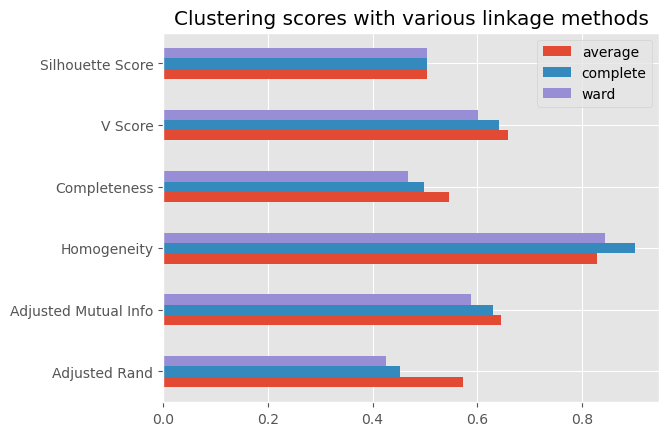

In [68]:
scoresdf = pd.DataFrame(aggScores, index=["average", "complete", "ward"]).T # Try removing the .T and see what happens
scoresdf.plot(kind="barh")
plt.title("Clustering scores with various linkage methods")
plt.show()

## Demonstrating the impact of linkage criteria choice

Here is a nice stack exchange discussion on what type of cluster shapes are best partitioned by a given linkage criteria. See the first response, titled "Methods overview."
https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering

- Single: "Chain-like" clusters
- Complete: Clusters with compact surfaces (like a circle or sphere) but possible non-compact (dense) inside
- Average: Generic "close-knit collective" clusters
- Ward: "Cloud" clusters that may have outliers, as if Gaussian distributed

This section demos single and complete linkage on two different types of data. Feel free to modify and explore with other data types or linkage criteria.

In [69]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use("ggplot")

marker_size = 35
edgecolor = None

Here, we'll define helper functions for creating synthetic data:

In [71]:
def my_circle(n, center=[0, 0], radius=1):
    phi = np.random.rand(n)*2*np.pi
    X = radius * np.stack((np.cos(phi), np.sin(phi)), axis=1)
    X += np.array(center)[None, :]
    return X

def my_filled_circle(n, center=[0, 0], radius=1):
    X = 2 * (np.random.rand(10*n, 2) - 0.5)
    X = X[np.linalg.norm(X, axis=1) < 1, :]
    X = radius * X[0:n, :]
    X += np.array(center)[None, :]
    return X

def my_gaussian(n, center=[0, 0], std=1):
    X = np.random.multivariate_normal(center, [[std, 0],[0, std]], n)
    return X

### Concentric circles / Rings

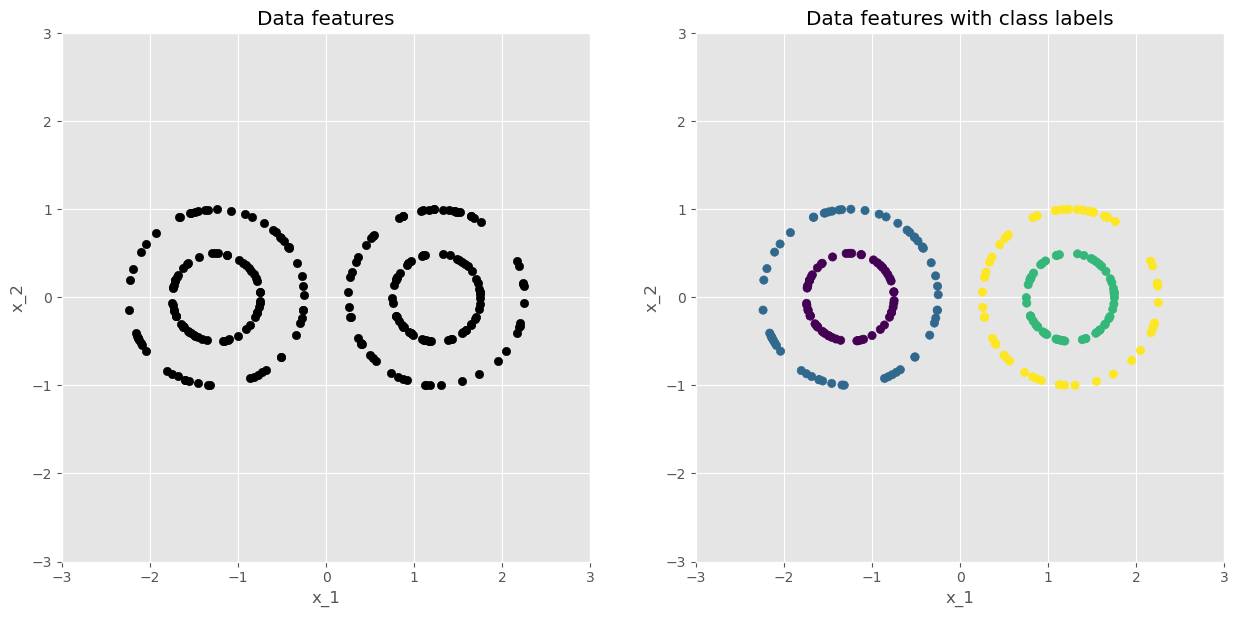

In [72]:
np.random.seed(seed=0) # Ensure repeatability

n = 60 # number of points per class

X = np.zeros((0, 2))
y = np.zeros(0)

centers = [[-1.25, 0], [-1.25, 0], [1.25, 0], [1.25, 0]]
radii = [0.5, 1, 0.5, 1]
for i, [c, r] in enumerate(zip(centers, radii)):
    X = np.concatenate((X, my_circle(n, center=c, radius=r)))
    y = np.concatenate((y, i * np.ones(n)))

# Plot features, with and without colors to indicate class identity
plt.figure(figsize=(15, 7.5))

ax = plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c='k', s=marker_size, edgecolor=edgecolor)
plt.title("Data features")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.axis([-3, 3, -3, 3])
ax.set_aspect('equal')

ax = plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=marker_size, edgecolor=edgecolor)
plt.title("Data features with class labels")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.axis([-3, 3, -3, 3])
ax.set_aspect('equal')

plt.show()

The data above were intentially created to have a human-subjective hierarchy, in which the four rings could be considered four independent clusters, but one might also group the lefthand rings into a single cluster, and the righthand rings into a second cluster.

Let's apply hierarchical clustering to the data, first with n_clusters=4 and then with n_cluster=2.

#### Rings: n_clusters=4

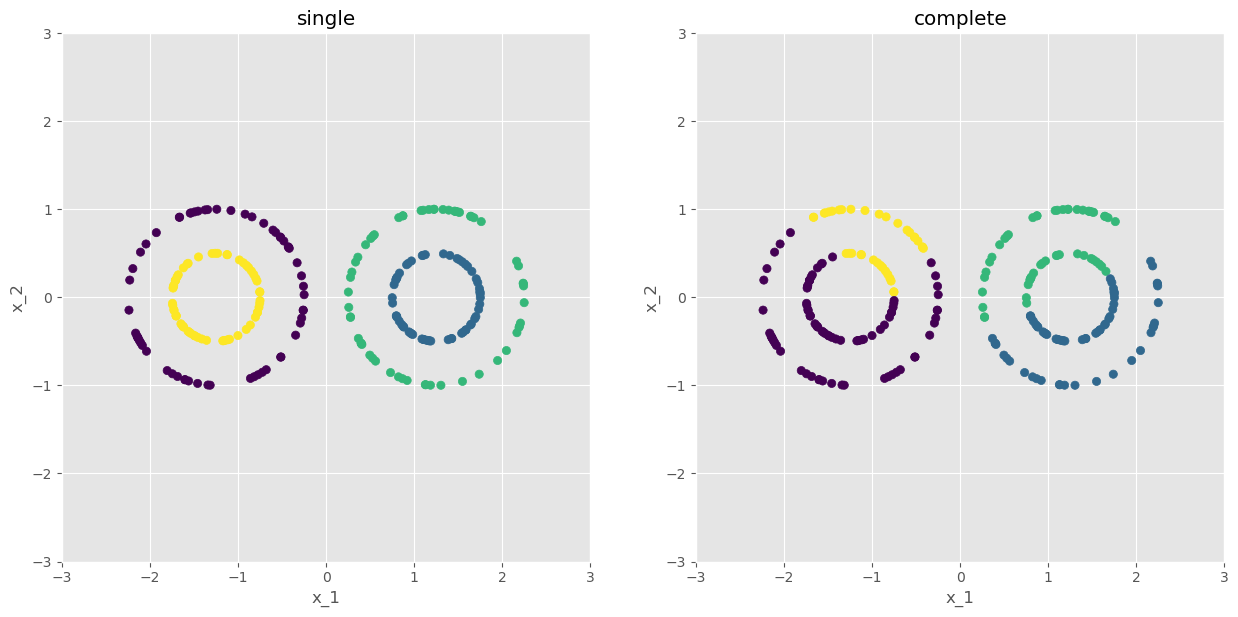

In [ ]:
n_clusters = 4

linkages = ["single", "complete"]
pred = []

for linkage in linkages:
    pred.append(AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(X))

# Plot features, with indicate cluster identity
plt.figure(figsize=(15, 15))

for i, linkage in enumerate(linkages):
    ax = plt.subplot(1, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=pred[i], s=marker_size, edgecolor=edgecolor)
    plt.title(linkage)
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.axis([-3, 3, -3, 3])
    ax.set_aspect('equal')

plt.show()

With n_clusters=4 we see that single linkage gave the result we would hope for. Complete linkage failed--in general, clustering points that were closer in Euclidean space rather than ones that were close to at least one other sample in the same cluster. Single linkage is a little bit like the collaborative filtering we discussed!

#### Rings: n_clusters=2

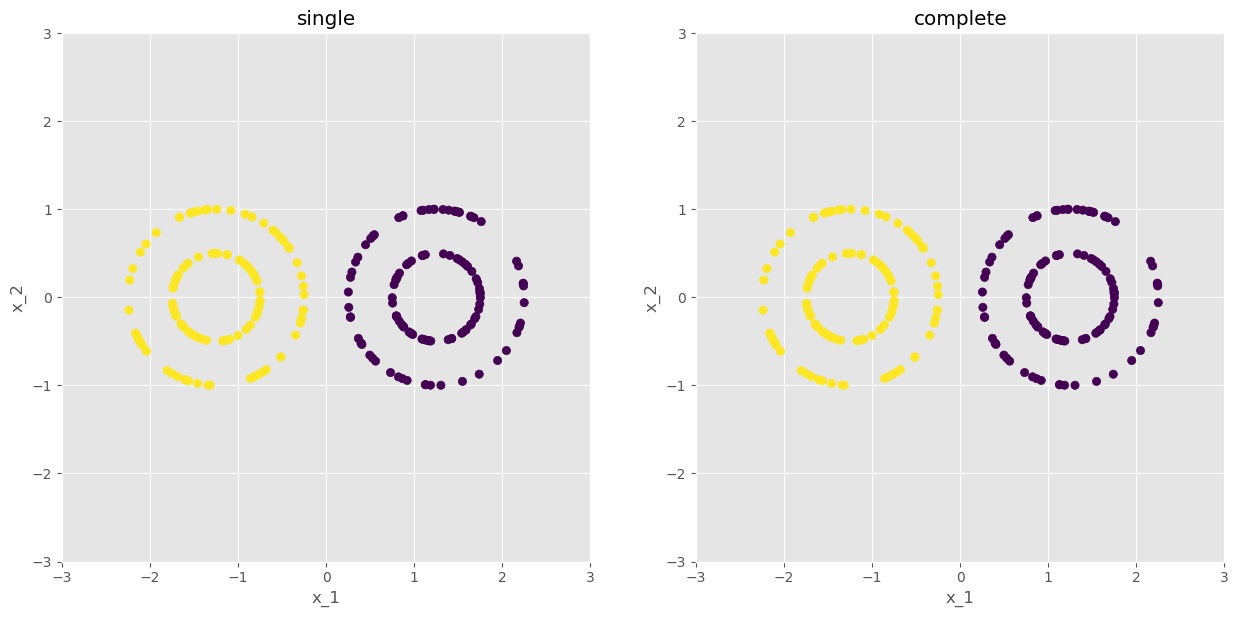

In [ ]:
n_clusters = 2

linkages = ["single", "complete"]
pred = []

for linkage in linkages:
    pred.append(AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(X))

# Plot features, with indicate cluster identity
plt.figure(figsize=(15, 15))

for i, linkage in enumerate(linkages):
    ax = plt.subplot(1, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=pred[i], s=marker_size, edgecolor=edgecolor)
    plt.title(linkage)
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.axis([-3, 3, -3, 3])
    ax.set_aspect('equal')

plt.show()

With 2 clusters, single and complete linkage both give successful results, but for different reasons.The complete linkage result is due to the Euclidean closeness of the collective points in the left cluster, and in the right cluster. The single linkage result is due to the closeness of an individual neighboring point amonst all the neighbors in the same cluster, the same reason for its success with n_clusters=4.

Now let's do this again, but with a different data set

### Gaussian Clouds

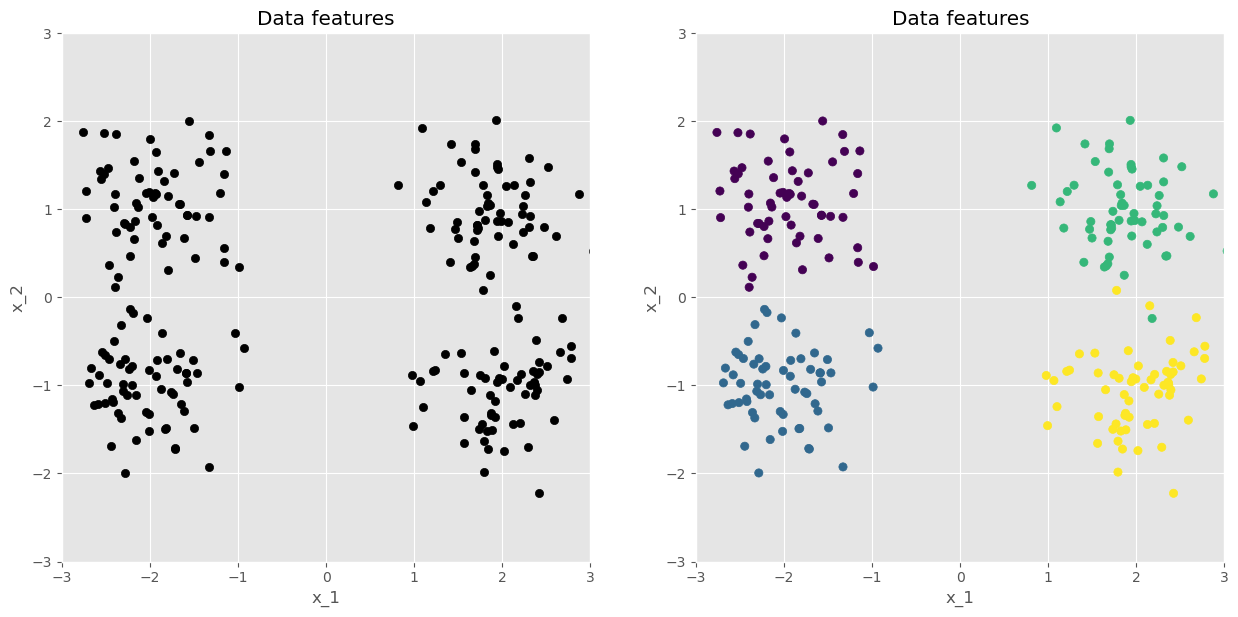

In [ ]:
np.random.seed(seed=0) # Ensure repeatability

n = 60 # number of points per class

X = np.zeros((0, 2))
y = np.zeros(0)

centers = [[-2, 1], [-2, -1], [2, 1], [2, -1]]
stds = 0.2 * np.ones(4)
for i, [c, s] in enumerate(zip(centers, stds)):
    X = np.concatenate((X, my_gaussian(n, center=c, std=s)))
    y = np.concatenate((y, i * np.ones(n)))


# Plot features, with and without colors to indicate class identity
plt.figure(figsize=(15, 7.5))

ax = plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], marker='o', c='k', s=marker_size, edgecolor=edgecolor)
plt.title("Data features")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.axis([-3, 3, -3, 3])
ax.set_aspect('equal')

ax = plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=marker_size, edgecolor=edgecolor)
plt.title("Data features")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.axis([-3, 3, -3, 3])
ax.set_aspect('equal')

plt.show()

As before, the data above were intentially created to have a human-subjective hierarchy, in which the four clouds of points could be considered four independent clusters, but one might also group the lefthand clouds into a single cluster, and the righthand clouds into a second cluster.

Let's apply hierarchical clustering to the data, first with n_clusters=4 and then with n_cluster=2.

#### Clouds: n_clusters=4

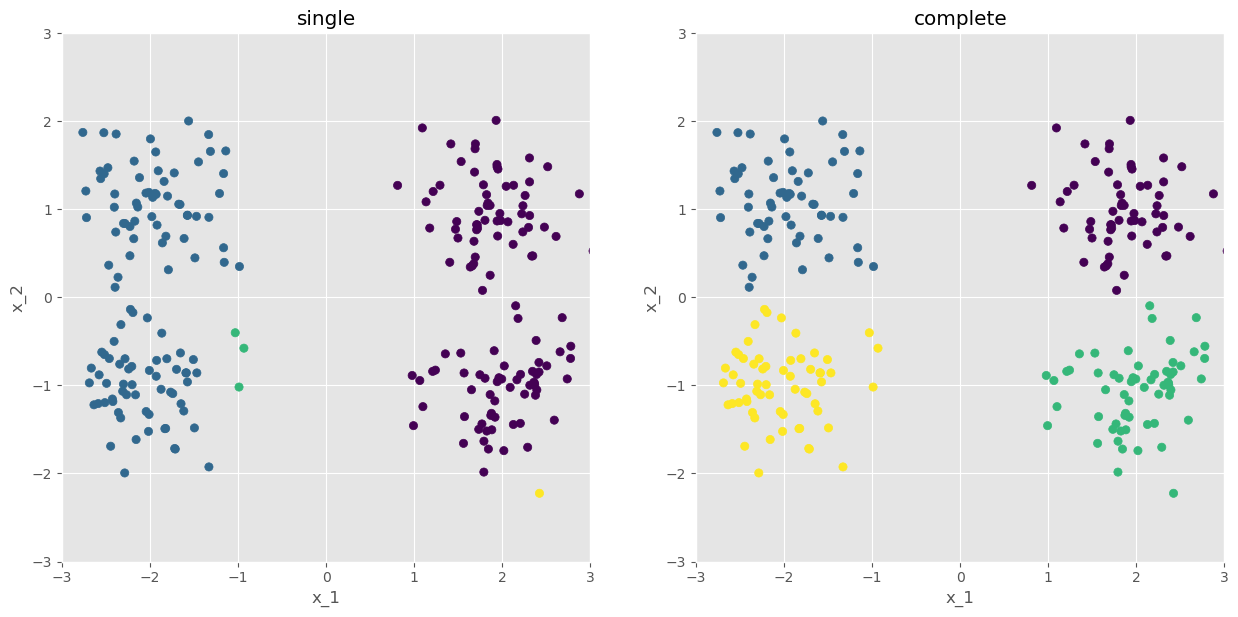

In [ ]:
n_clusters = 4

linkages = ["single", "complete"]
pred = []

for linkage in linkages:
    pred.append(AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(X))

# Plot features, with indicate cluster identity
plt.figure(figsize=(15, 15))

for i, linkage in enumerate(linkages):
    ax = plt.subplot(1, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=pred[i], s=marker_size, edgecolor=edgecolor)
    plt.title(linkage)
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.axis([-3, 3, -3, 3])
    ax.set_aspect('equal')

plt.show()

Here we see the potential weakness of single linkage. Outlying points can greatly impact the results. This is directly due to the "at least one close neighbor" aspect of the criterion. We see that rather than clustering the samples into four cluster of nearly equal size (as was done under the complete linkage criterion), it placed almost all of the points in only the two "higher-level" clusters, and put only a handful of points in the remaining two clusters.

#### Clouds: n_clusters=2

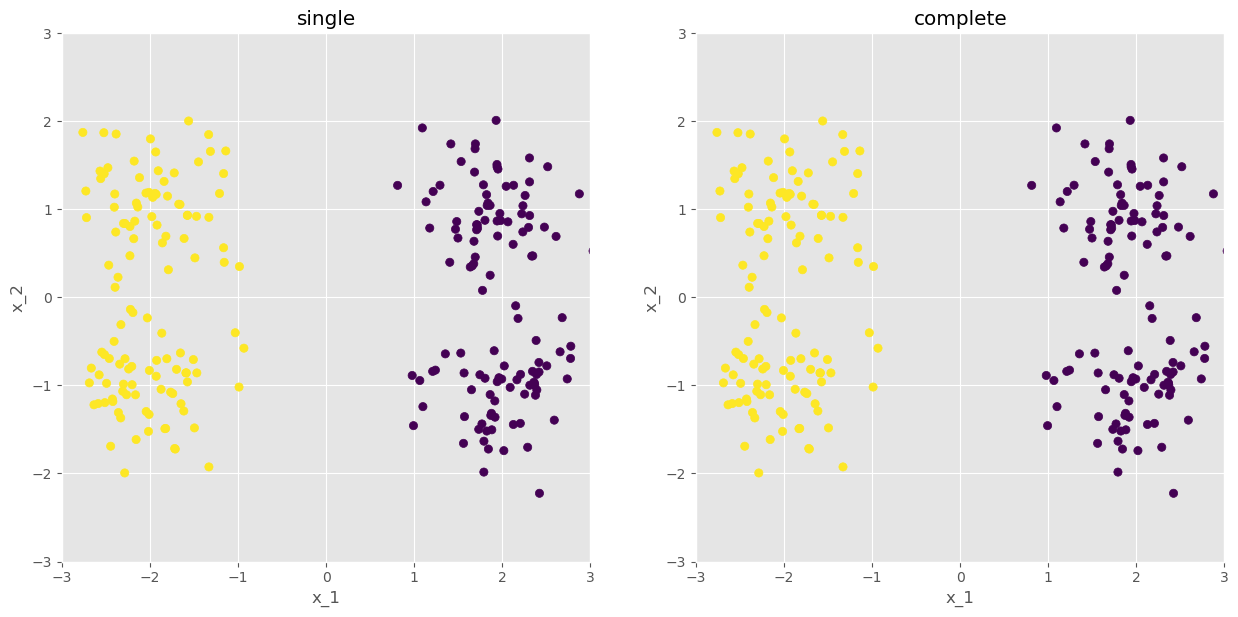

In [ ]:
n_clusters = 2

linkages = ["single", "complete"]
pred = []

for linkage in linkages:
    pred.append(AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit_predict(X))

# Plot features, with indicate cluster identity
plt.figure(figsize=(15, 15))

for i, linkage in enumerate(linkages):
    ax = plt.subplot(1, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=pred[i], s=marker_size, edgecolor=edgecolor)
    plt.title(linkage)
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.axis([-3, 3, -3, 3])
    ax.set_aspect('equal')

plt.show()

Having now forced the clustering to form only two clusters, both linkage criteria do well for this data set. Where the two higher level clusters closer together, the single linkage criterion may have once again placed nearly all points into one cluster, and just one or a few points into the second cluster.

## Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

In [73]:
# Create a spectral clustering classifier saved as `clf`, using n_clusters=3.
# Fit clf to the iris data
# Predict values for the iris data using clf and save them as spectral_pred
# YOUR CODE HERE
from sklearn import datasets
iris = datasets.load_iris()
x= iris.data
y=iris.target
clf=SpectralClustering(n_clusters=3).fit(x)
spectral_pred=clf.fit_predict(x)

c:\Users\Drewr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Drewr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [75]:
spectral_scores = clustering_scorer(iris_features, iris_targets, spectral_pred)

In [76]:
for key in ['Adjusted Rand', 'Adjusted Mutual Info', 'Homogeneity', 'Completeness', 'V Score', 'Silhouette Score']:
    assert key in spectral_scores.keys()

In [77]:
assert clf.n_clusters == 3

In [78]:
if len(aggScores) == 3:
    aggScores.append(spectral_scores)

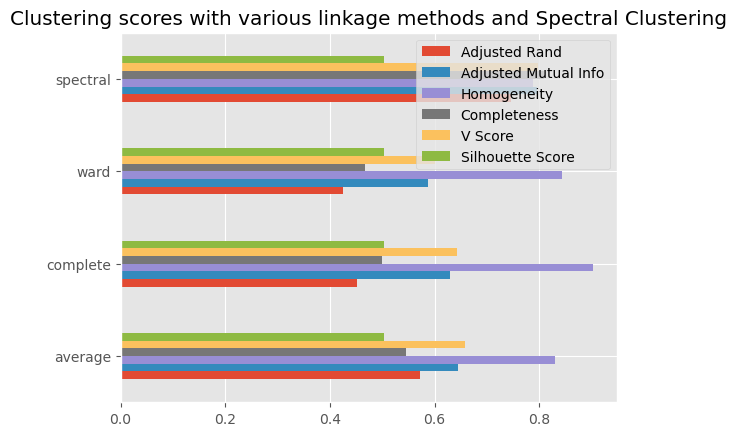

In [79]:
scoresdf = pd.DataFrame(aggScores, index=["average", "complete", "ward", "spectral"]) # Try removing the .T and see what happens
scoresdf.plot(kind="barh")
plt.title("Clustering scores with various linkage methods and Spectral Clustering")
plt.show()

## Clustering Overview

The below code is copied from http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html and is here for you to see how different methods work with varying input data. We haven't gone over all these methods and so you can focus only on what we've covered. We will go over some of the other methods in a later lecture.

c:\Users\Drewr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Drewr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Drewr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Drewr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: Mini

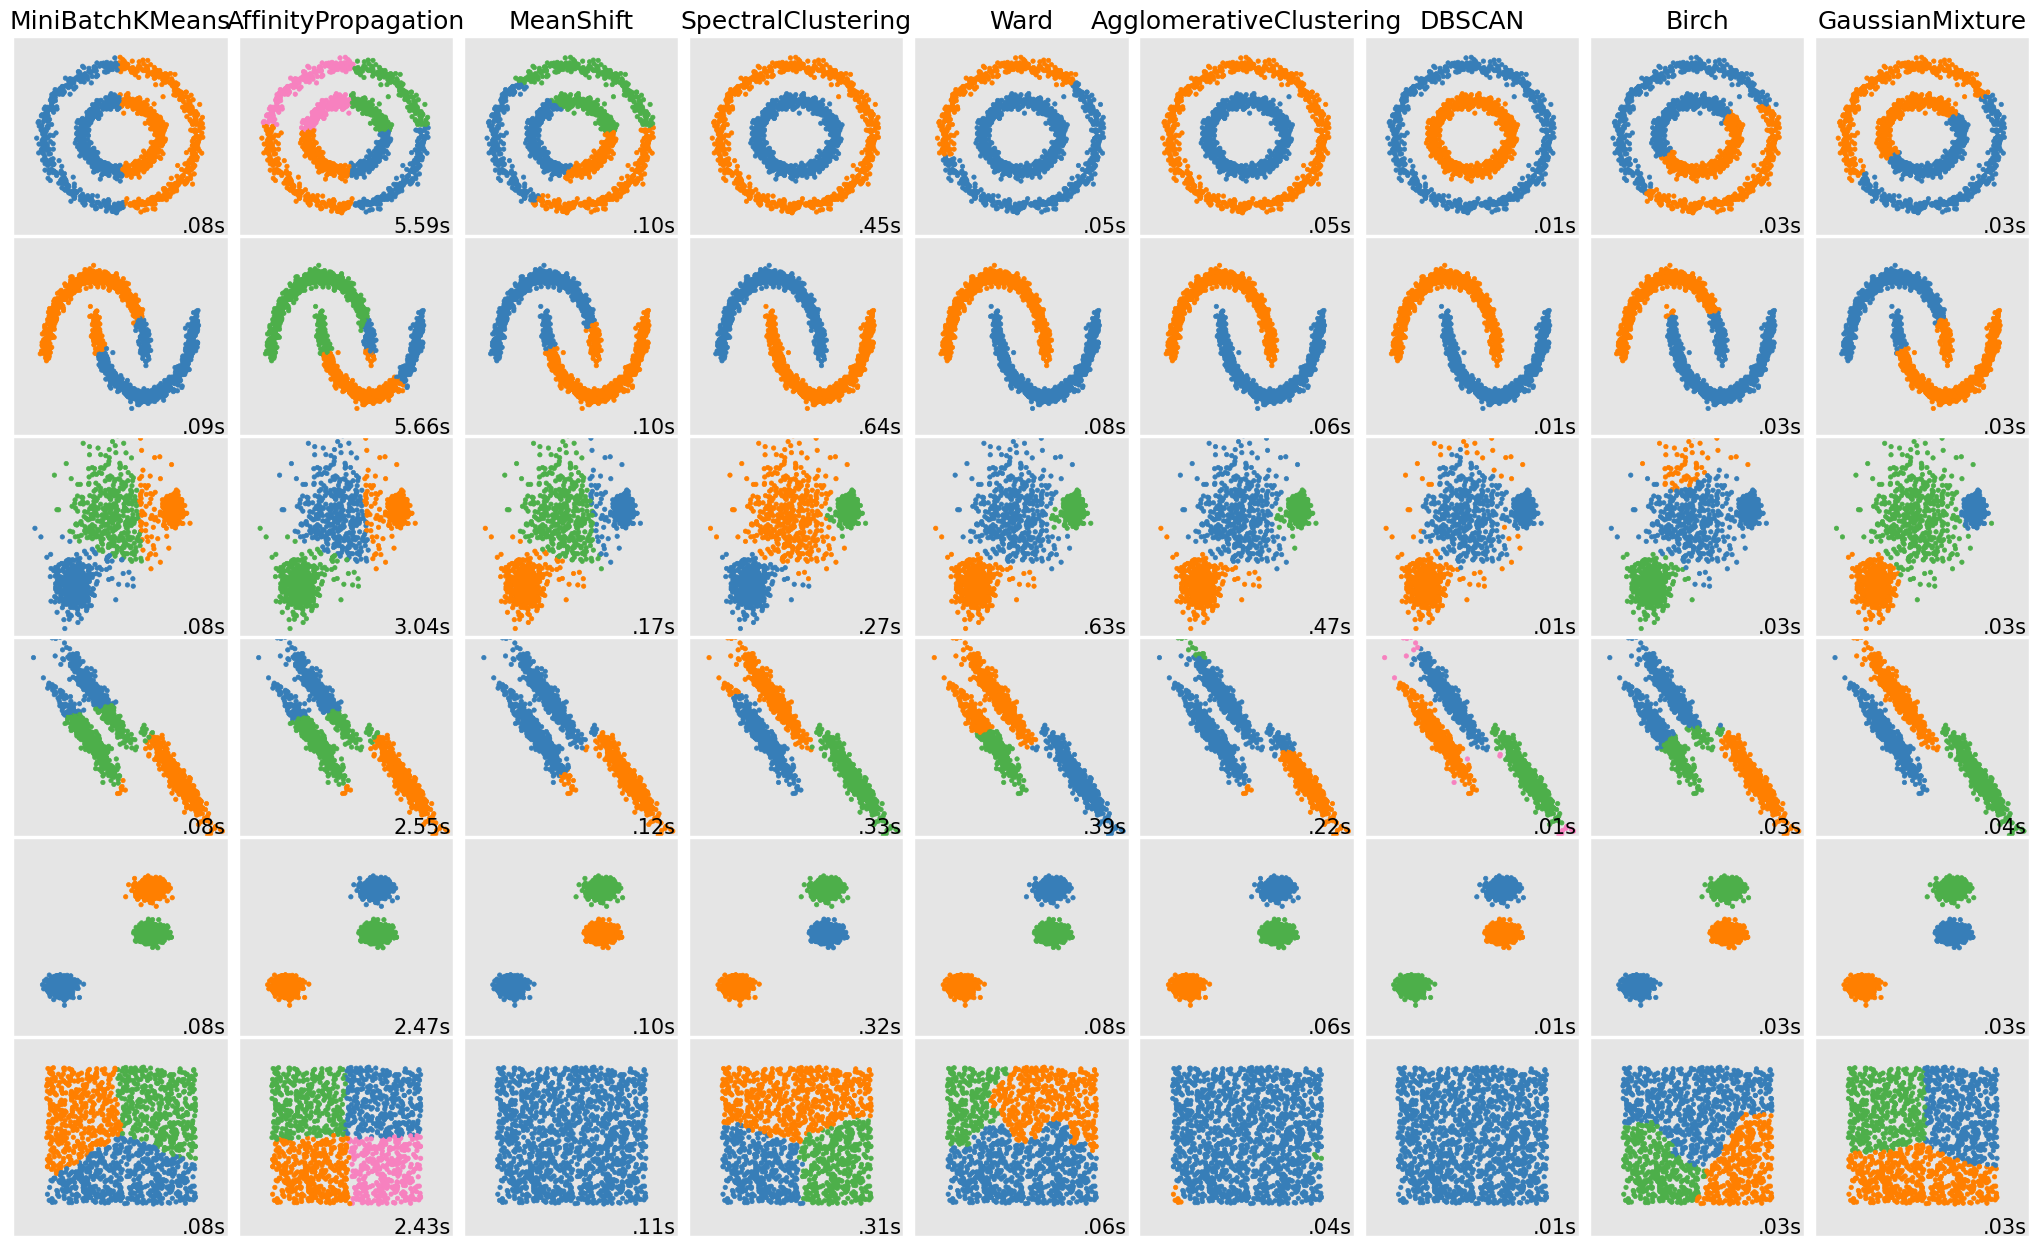

In [83]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", metric="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## Feedback